In [2]:
import numpy
import numpy as np
import pandas as pd
import sys, glob
import urllib3
import h5py
import cdsapi, zipfile, os, time
sys.path.append(os.getcwd()+'/../cds-backend/code/')
import cds_eua3 as eua
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 10),
         'axes.labelsize': 20,
         'axes.titlesize': 24,
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

In [4]:
fn = glob.glob('/raid60/scratch/federico/MERGED_DATABASE_OCTOBER2020_sensor/0-20000-0-01384_CEUAS_merged_v0.nc')[0]
with eua.CDMDataset(fn) as test:
    aa = test.to_dataframe(groups=['observations_table'], variables=['z_coordinate', 'date_time', 'observed_variable', 'observation_value', 'conversion_flag', 'conversion_method', 'source_id', 'units', 'original_units'])
with eua.CDMDataset(fn) as test:
    bb = test.to_dataframe(groups=['era5fb'], variables=['an_depar@body','fg_depar@body','biascorr@body','biascorr_fg@body'])
orig=pd.concat([aa, bb.reindex(aa.index)], axis=1)

2021-01-22 12:08:41,328 - upperair.cdm | __init__ - DEBUG - [OPEN] /raid60/scratch/federico/MERGED_DATABASE_OCTOBER2020_sensor/0-20000-0-01384_CEUAS_merged_v0.nc
2021-01-22 12:08:42,539 - upperair.cdm | to_dataframe - INFO - Reading Profile on slice(None, None, None)
2021-01-22 12:08:43,396 - upperair.cdm | to_dataframe - DEBUG - Read variables: dict_keys(['z_coordinate', 'date_time', 'observed_variable', 'observation_value', 'conversion_flag', 'conversion_method', 'source_id', 'units', 'original_units'])
2021-01-22 12:08:47,340 - upperair.cdm | close - DEBUG - [CLOSED] /raid60/scratch/federico/MERGED_DATABASE_OCTOBER2020_sensor/0-20000-0-01384_CEUAS_merged_v0.nc
2021-01-22 12:08:47,348 - upperair.cdm | __init__ - DEBUG - [OPEN] /raid60/scratch/federico/MERGED_DATABASE_OCTOBER2020_sensor/0-20000-0-01384_CEUAS_merged_v0.nc
2021-01-22 12:08:47,641 - upperair.cdm | to_dataframe - INFO - Reading Profile on slice(None, None, None)
2021-01-22 12:08:48,105 - upperair.cdm | to_dataframe - DEBU

In [20]:
fn = glob.glob('/raid60/scratch/uli/converted_test/0-20000-0-01384*.nc')[0]
with eua.CDMDataset(fn) as test:
    aa = test.to_dataframe(groups=['observations_table'], variables=['z_coordinate', 'date_time', 'observed_variable', 'observation_value', 'conversion_flag', 'conversion_method', 'source_id', 'units', 'original_units'])
with eua.CDMDataset(fn) as test:
    bb = test.to_dataframe(groups=['era5fb'], variables=['an_depar@body','fg_depar@body','biascorr@body','biascorr_fg@body'])
conv=pd.concat([aa, bb.reindex(aa.index)], axis=1)

2021-01-22 12:31:47,960 - upperair.cdm | __init__ - DEBUG - [OPEN] /raid60/scratch/uli/converted_test/0-20000-0-01384_CEUAS_merged_v0.nc
2021-01-22 12:31:49,249 - upperair.cdm | to_dataframe - INFO - Reading Profile on slice(None, None, None)
2021-01-22 12:31:50,461 - upperair.cdm | to_dataframe - DEBUG - Read variables: dict_keys(['z_coordinate', 'date_time', 'observed_variable', 'observation_value', 'conversion_flag', 'conversion_method', 'source_id', 'units', 'original_units'])
2021-01-22 12:31:55,822 - upperair.cdm | close - DEBUG - [CLOSED] /raid60/scratch/uli/converted_test/0-20000-0-01384_CEUAS_merged_v0.nc
2021-01-22 12:31:55,829 - upperair.cdm | __init__ - DEBUG - [OPEN] /raid60/scratch/uli/converted_test/0-20000-0-01384_CEUAS_merged_v0.nc
2021-01-22 12:31:56,061 - upperair.cdm | to_dataframe - INFO - Reading Profile on slice(None, None, None)
2021-01-22 12:31:56,506 - upperair.cdm | to_dataframe - DEBUG - Read variables: dict_keys(['an_depar@body', 'fg_depar@body', 'biascorr@

---

# biascorr check for NaN

In [21]:
orig[orig.conversion_flag != -2147483648]

,z_coordinate,date_time,observed_variable,observation_value,conversion_flag,conversion_method,source_id,units,original_units,an_depar@body,fg_depar@body,biascorr@body,biascorr_fg@body


In [22]:
orig[orig.conversion_method != -2147483648]

,z_coordinate,date_time,observed_variable,observation_value,conversion_flag,conversion_method,source_id,units,original_units,an_depar@body,fg_depar@body,biascorr@body,biascorr_fg@body


In [23]:
orig[orig['an_depar@body'] == 0]

,z_coordinate,date_time,observed_variable,observation_value,conversion_flag,conversion_method,source_id,units,original_units,an_depar@body,fg_depar@body,biascorr@body,biascorr_fg@body
0,60000.0,1932-01-07 10:00:00,117,35451.039062,-2147483648,-2147483648,era5_1761,631,-2147483648,0.0,0.0,0.0,0.0
1,60000.0,1932-01-07 10:00:00,85,250.550003,-2147483648,-2147483648,era5_1761,5,-2147483648,0.0,0.0,0.0,0.0
2,70000.0,1932-01-07 10:00:00,117,24266.554688,-2147483648,-2147483648,era5_1761,631,-2147483648,0.0,0.0,0.0,0.0
3,70000.0,1932-01-07 10:00:00,85,258.850006,-2147483648,-2147483648,era5_1761,5,-2147483648,0.0,0.0,0.0,0.0
4,92500.0,1932-01-07 10:00:00,117,5484.859375,-2147483648,-2147483648,era5_1761,631,-2147483648,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5649153,96000.0,2001-03-31 06:00:00,106,200.000000,-2147483648,-2147483648,igra2,110,-2147483648,0.0,0.0,0.0,0.0
5649154,98800.0,2001-03-31 06:00:00,85,273.549988,-2147483648,-2147483648,igra2,5,-2147483648,0.0,0.0,0.0,0.0
5649155,98800.0,2001-03-31 06:00:00,107,4.000000,-2147483648,-2147483648,igra2,731,-2147483648,0.0,0.0,0.0,0.0
5649156,98800.0,2001-03-31 06:00:00,106,190.000000,-2147483648,-2147483648,igra2,110,-2147483648,0.0,0.0,0.0,0.0


In [24]:
display(conv[conv.conversion_flag == 0][conv['biascorr@body']==0])
display(conv[conv.conversion_flag == 0][conv['biascorr@body']==0].source_id.drop_duplicates())
display(conv[conv.conversion_flag == 0][conv['biascorr@body']!=0])
display(conv[conv.conversion_flag == 0][conv['biascorr@body']!=0].source_id.drop_duplicates())

,z_coordinate,date_time,observed_variable,observation_value,conversion_flag,conversion_method,source_id,units,original_units,an_depar@body,fg_depar@body,biascorr@body,biascorr_fg@body


Series([], Name: source_id, dtype: object)

,z_coordinate,date_time,observed_variable,observation_value,conversion_flag,conversion_method,source_id,units,original_units,an_depar@body,fg_depar@body,biascorr@body,biascorr_fg@body
5891,70000.0,1949-01-03 02:00:00,34,6.000000,0,3,era5_1759,0,-2147483648,0.0,0.0,NaN,NaN
5892,85000.0,1949-01-03 02:00:00,34,1.560000,0,3,era5_1759,0,-2147483648,0.0,0.0,NaN,NaN
5893,95700.0,1949-01-03 02:00:00,34,0.640000,0,3,era5_1759,0,-2147483648,0.0,0.0,NaN,NaN
5894,50000.0,1949-01-04 03:00:00,34,5.040000,0,3,era5_1759,0,-2147483648,0.0,0.0,NaN,NaN
5895,51600.0,1949-01-04 03:00:00,34,4.330000,0,3,era5_1759,0,-2147483648,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249560,92500.0,2001-03-31 06:00:00,105,-5.437847,0,1,igra2,5,-2147483648,NaN,NaN,NaN,NaN
4249561,93500.0,2001-03-31 06:00:00,105,-5.196153,0,1,igra2,5,-2147483648,NaN,NaN,NaN,NaN
4249562,96000.0,2001-03-31 06:00:00,105,-1.710101,0,1,igra2,5,-2147483648,NaN,NaN,NaN,NaN
4249563,98800.0,2001-03-31 06:00:00,105,-0.694593,0,1,era5_1,731,-2147483648,NaN,NaN,NaN,NaN


5891      era5_1759
5904           ncar
8883         era5_2
71068         igra2
302775       era5_1
Name: source_id, dtype: object

---

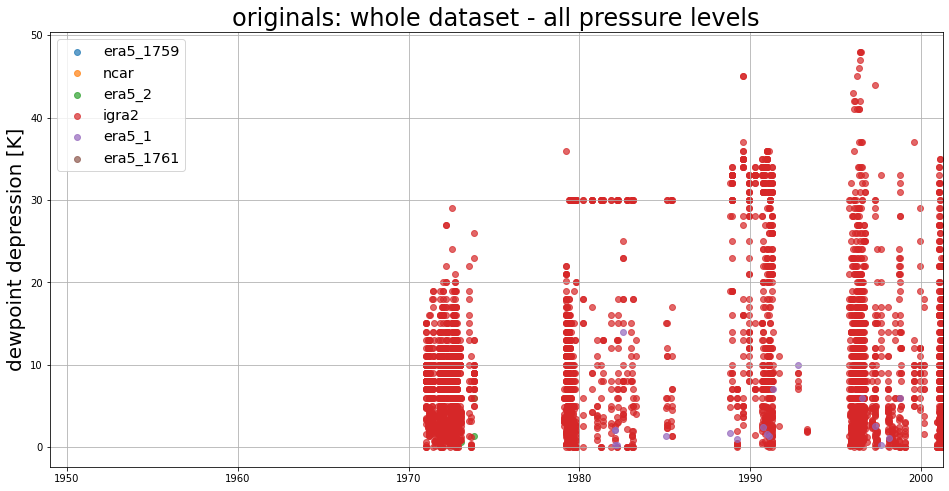

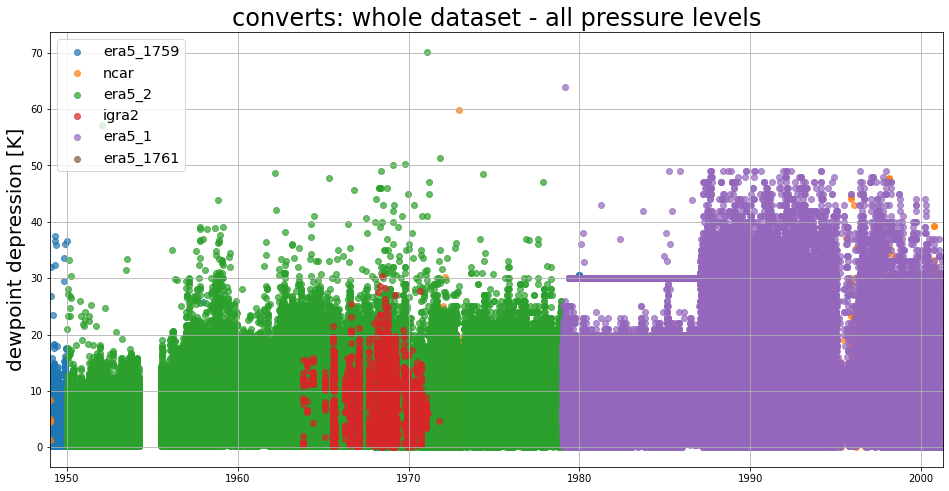

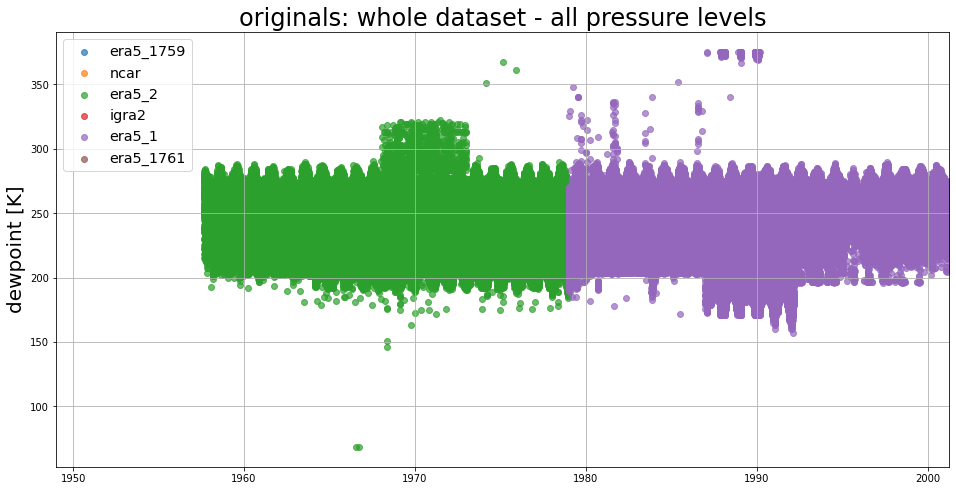

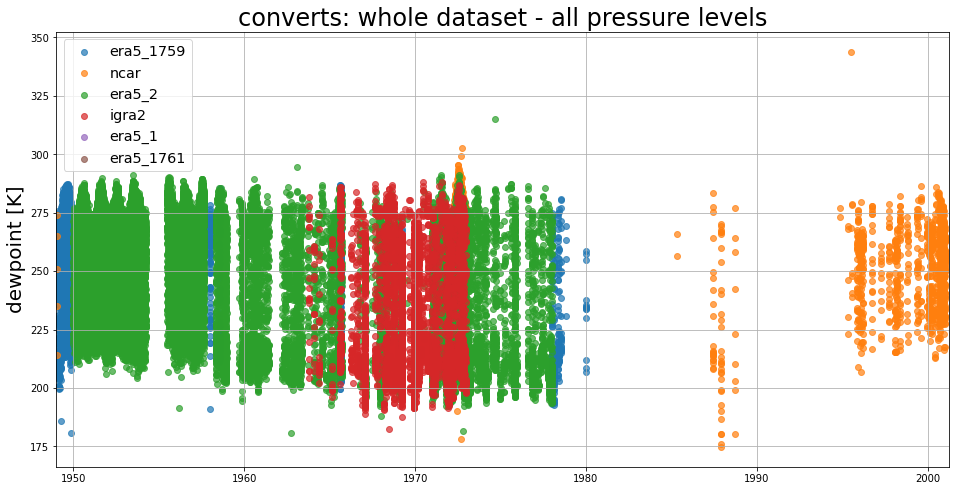

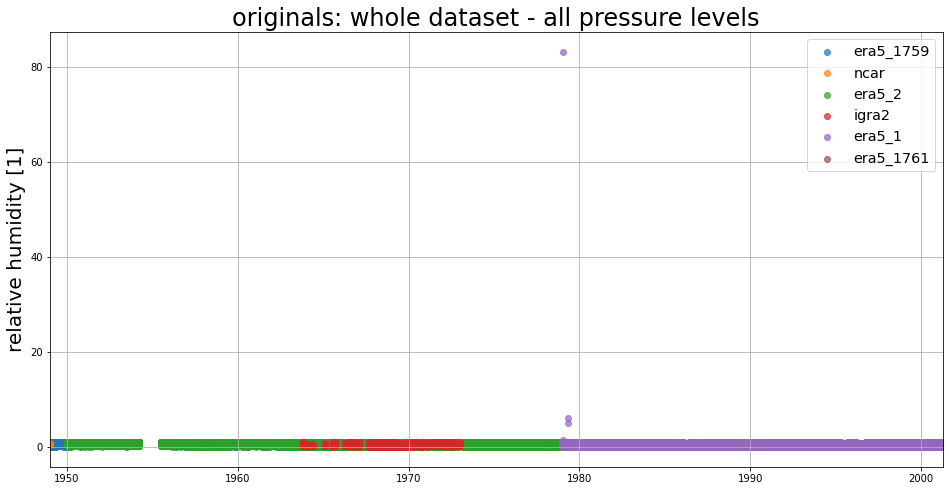

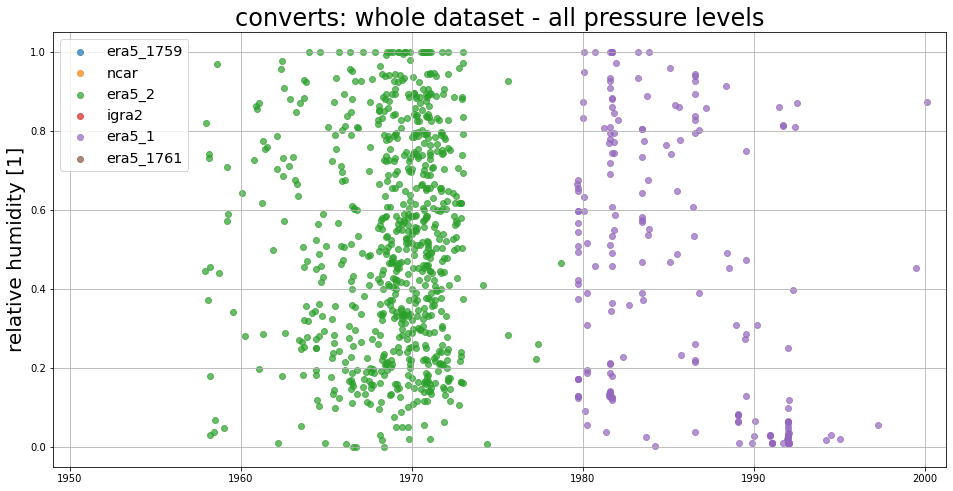

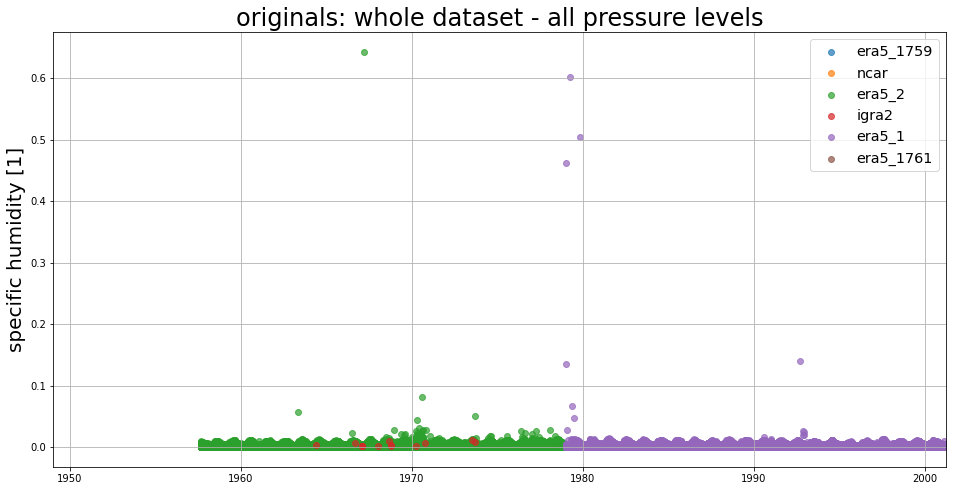

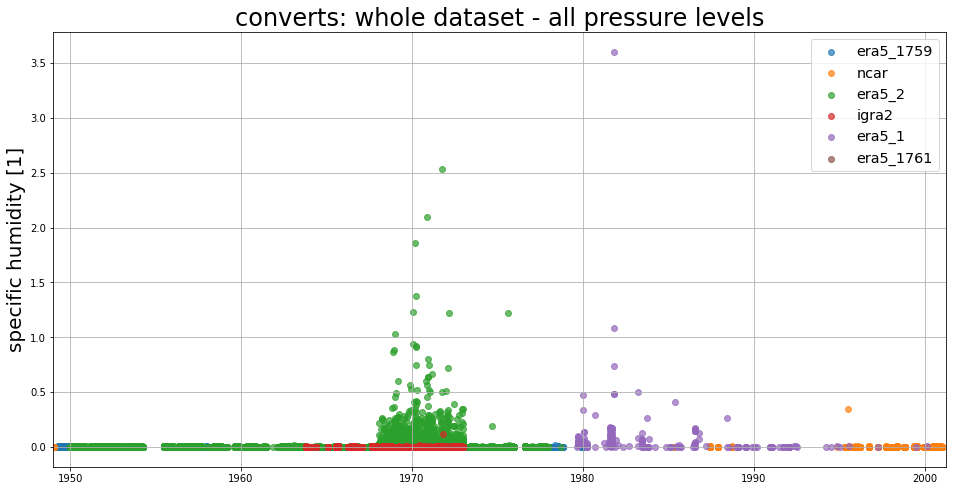

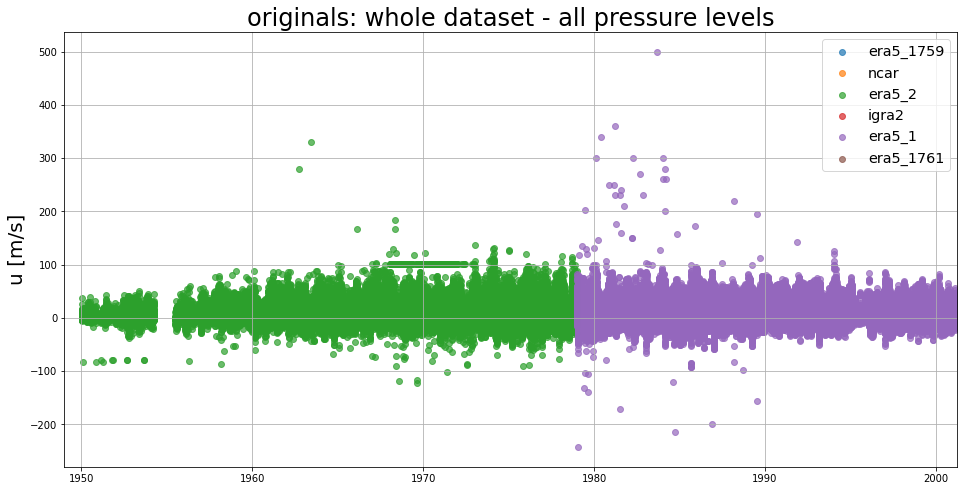

In [ ]:
converted_era5_1759 = aa[aa.conversion_flag == 0][aa.source_id == 'era5_1759']
converted_ncar = aa[aa.conversion_flag == 0][aa.source_id == 'ncar']
converted_era5_2 = aa[aa.conversion_flag == 0][aa.source_id == 'era5_2']
converted_igra2 = aa[aa.conversion_flag == 0][aa.source_id == 'igra2']
converted_era5_1 = aa[aa.conversion_flag == 0][aa.source_id == 'era5_1']
converted_era5_1761 = aa[aa.conversion_flag == 0][aa.source_id == 'era5_1761']

original_era5_1759 = aa[aa.conversion_flag != 0][aa.source_id == 'era5_1759']
original_ncar = aa[aa.conversion_flag != 0][aa.source_id == 'ncar']
original_era5_2 = aa[aa.conversion_flag != 0][aa.source_id == 'era5_2']
original_igra2 = aa[aa.conversion_flag != 0][aa.source_id == 'igra2']
original_era5_1 = aa[aa.conversion_flag != 0][aa.source_id == 'era5_1']
original_era5_1761 = aa[aa.conversion_flag != 0][aa.source_id == 'era5_1761']

start = aa.date_time.iloc[0]
end = aa.date_time.iloc[-1]
originals = [original_era5_1759, original_ncar, original_era5_2, original_igra2, original_era5_1, original_era5_1761]
converts = [converted_era5_1759, converted_ncar, converted_era5_2, converted_igra2, converted_era5_1, converted_era5_1761]
    
varlist = [34,36,38,39,104,105,106,107]
labellist = ['dewpoint depression [K]','dewpoint [K]','relative humidity [1]','specific humidity [1]','u [m/s]','v [m/s]','wind direction [°]','wind speed [m/s]']
names = ['era5_1759', 'ncar', 'era5_2', 'igra2', 'era5_1', 'era5_1761']
for i in range(len(varlist)):
    var = varlist[i]
    lab = labellist[i]
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    for o in range(len(originals)):
        data = originals[o][originals[o].observed_variable == var]
        ax1.scatter(data['date_time'], data['observation_value'], label = names[o], alpha=0.7)
    ax1.set_xlim([start, end])
    ax1.set(ylabel=lab, title='originals: whole dataset - all pressure levels')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    for o in range(len(converts)):
        data = converts[o][converts[o].observed_variable == var]
        ax1.scatter(data['date_time'], data['observation_value'], label = names[o], alpha=0.7)
    ax1.set_xlim([start, end])
    ax1.set(ylabel=lab, title='converts: whole dataset - all pressure levels')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

# specific humidity:

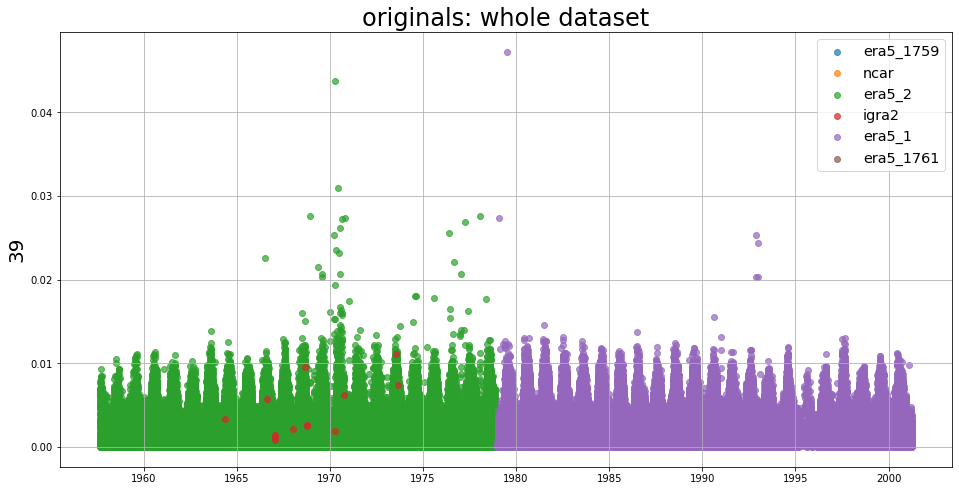

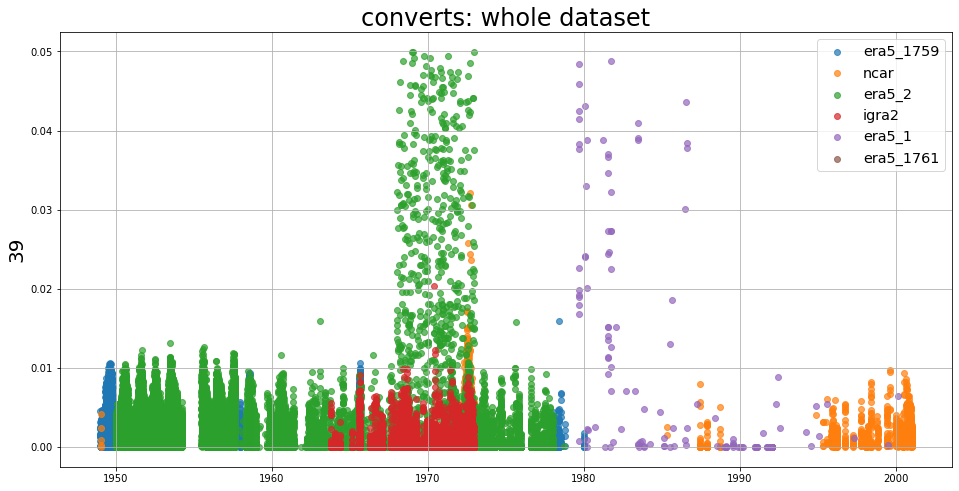

In [15]:
varlist = [39]
names = ['era5_1759', 'ncar', 'era5_2', 'igra2', 'era5_1', 'era5_1761']
for i in varlist:
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    for o in range(len(originals)):
        data = originals[o][originals[o].observed_variable == i][originals[o].observation_value < 0.05][originals[o].observation_value > -0.01]
        ax1.scatter(data['date_time'], data['observation_value'], label = names[o], alpha=0.7)
    ax1.set(ylabel=i, title='originals: whole dataset')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    for o in range(len(converts)):
        data = converts[o][converts[o].observed_variable == i][converts[o].observation_value < 0.05][converts[o].observation_value > -0.01]
        ax1.scatter(data['date_time'], data['observation_value'], label = names[o], alpha=0.7)
    ax1.set(ylabel=i, title='converts: whole dataset')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)


# relative humidity:

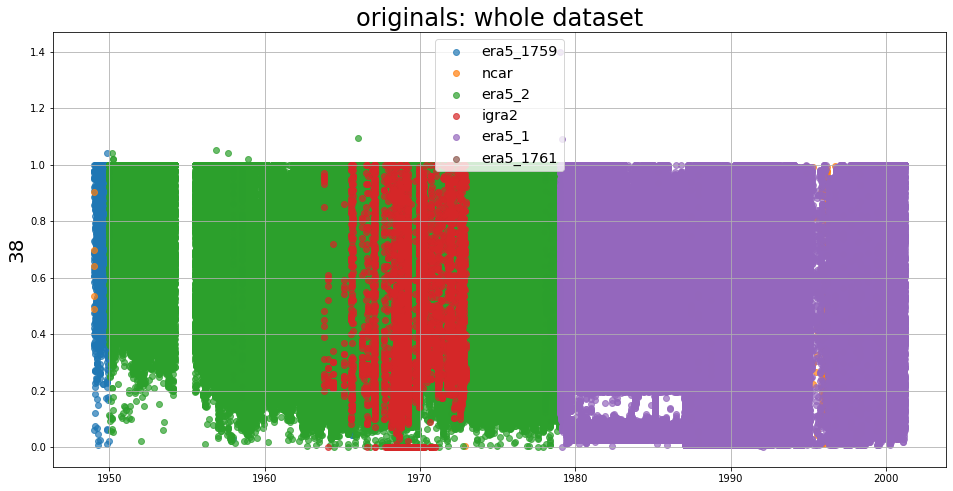

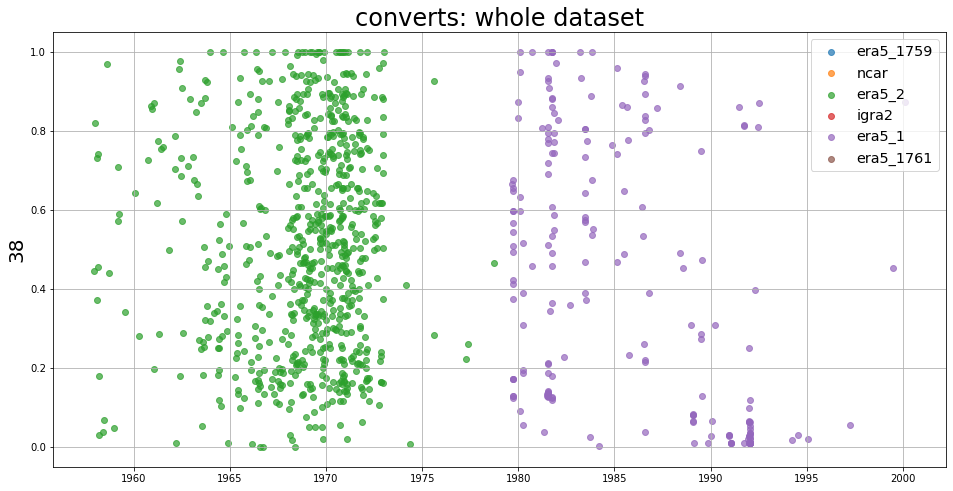

In [16]:
varlist = [38]
names = ['era5_1759', 'ncar', 'era5_2', 'igra2', 'era5_1', 'era5_1761']
for i in varlist:
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    for o in range(len(originals)):
        data = originals[o][originals[o].observed_variable == i][originals[o].observation_value < 2]
        ax1.scatter(data['date_time'], data['observation_value'], label = names[o], alpha=0.7)
    ax1.set(ylabel=i, title='originals: whole dataset')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    for o in range(len(converts)):
        data = converts[o][converts[o].observed_variable == i][converts[o].observation_value < 2]
        ax1.scatter(data['date_time'], data['observation_value'], label = names[o], alpha=0.7)
    ax1.set(ylabel=i, title='converts: whole dataset')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

# humidity

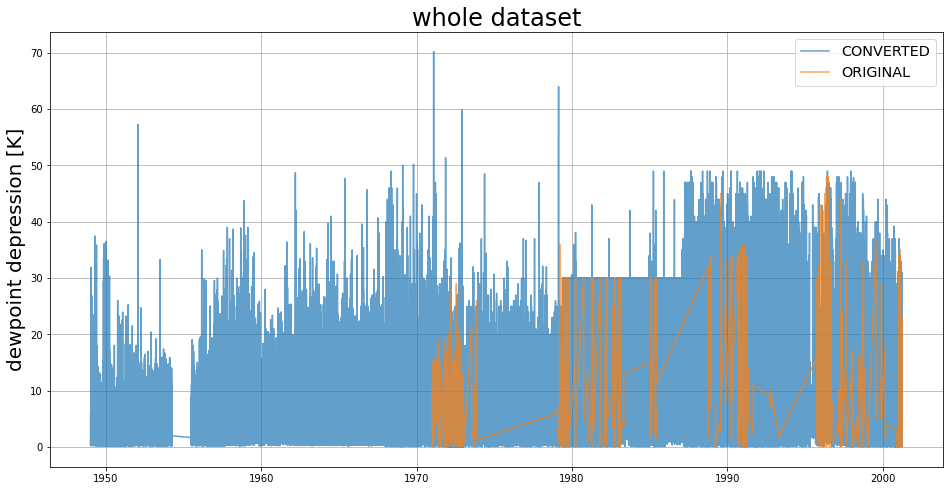

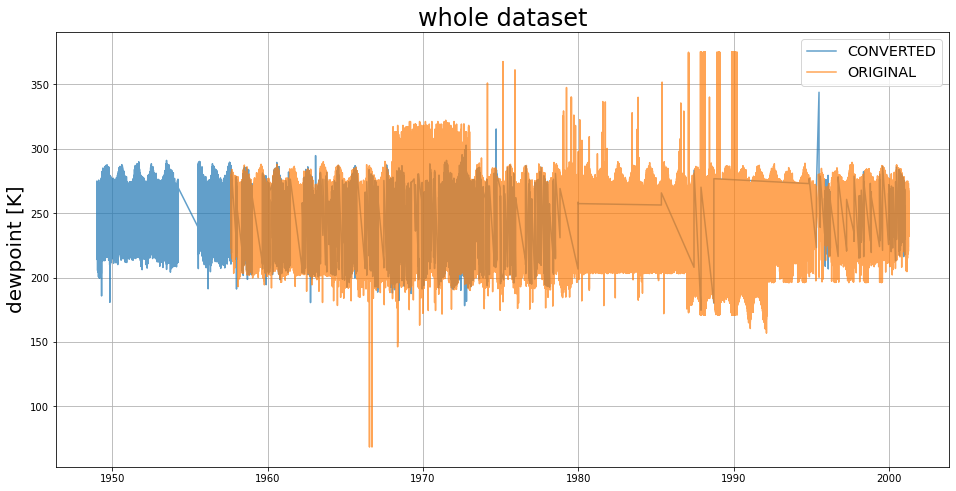

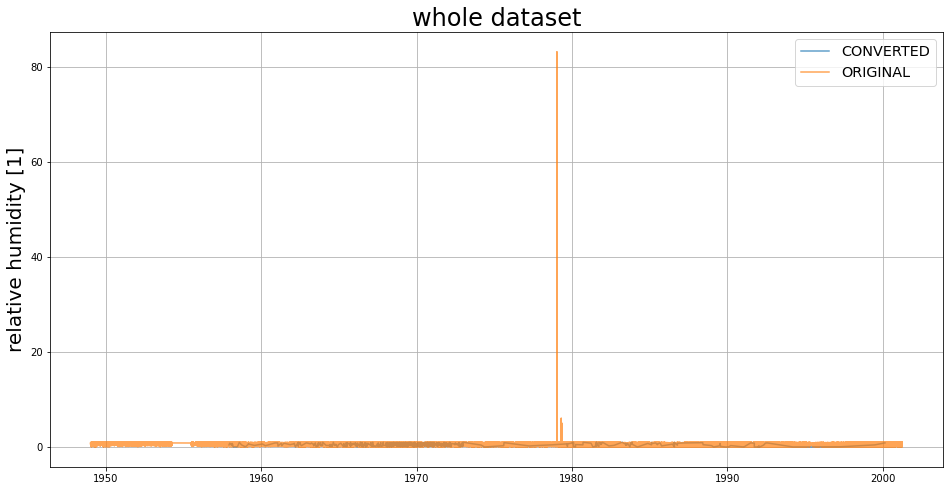

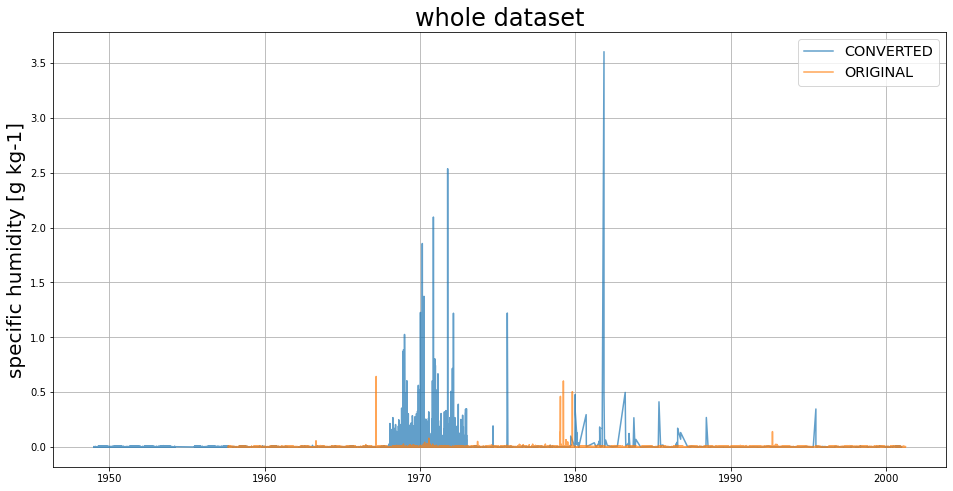

In [17]:
converted = aa[aa.observed_variable == 34][aa.conversion_flag == 0]
original = aa[aa.observed_variable == 34][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='dewpoint depression [K]', title='whole dataset')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.observed_variable == 36][aa.conversion_flag == 0]
original = aa[aa.observed_variable == 36][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='dewpoint [K]', title='whole dataset')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.observed_variable == 38][aa.conversion_flag == 0]
original = aa[aa.observed_variable == 38][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='relative humidity [1]', title='whole dataset')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.observed_variable == 39][aa.conversion_flag == 0]
original = aa[aa.observed_variable == 39][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='specific humidity [g kg-1]', title='whole dataset')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

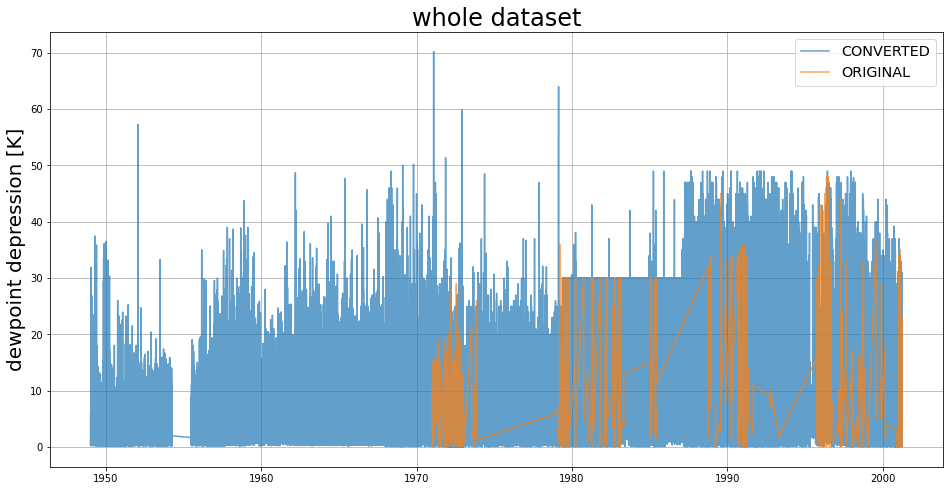

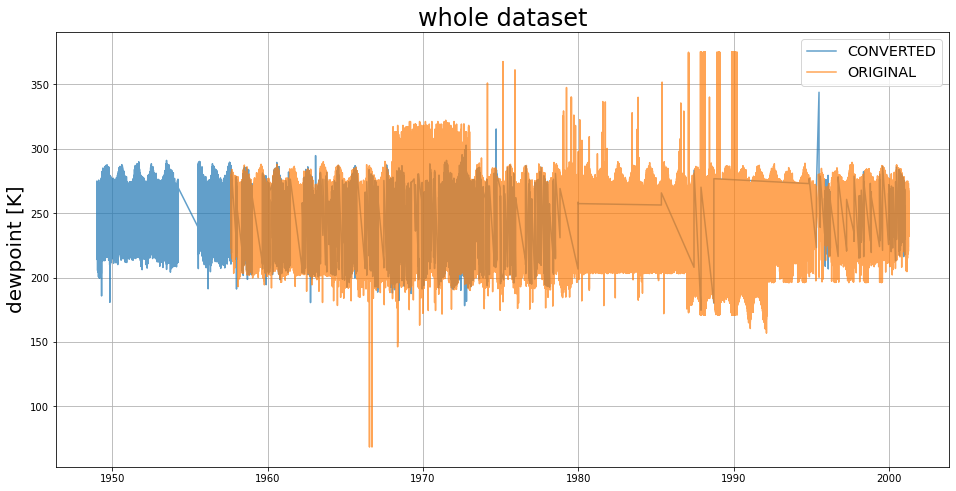

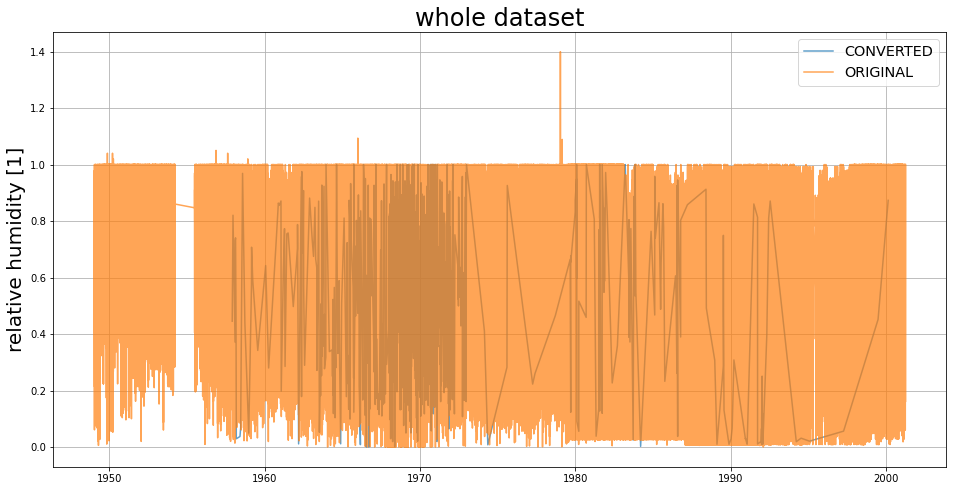

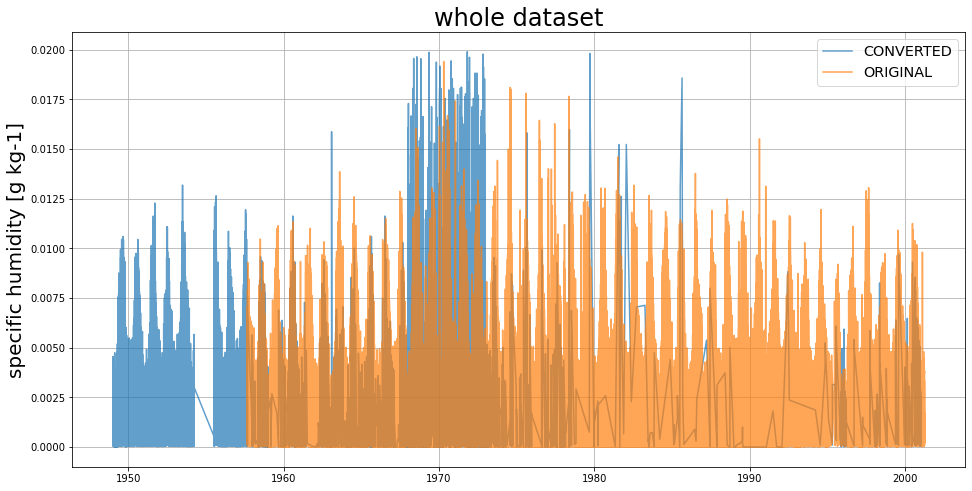

In [18]:
converted = aa[aa.observed_variable == 34][aa.conversion_flag == 0]
original = aa[aa.observed_variable == 34][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='dewpoint depression [K]', title='whole dataset')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.observed_variable == 36][aa.conversion_flag == 0]
original = aa[aa.observed_variable == 36][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='dewpoint [K]', title='whole dataset')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.observed_variable == 38][aa.conversion_flag == 0][aa.observation_value < 5]
original = aa[aa.observed_variable == 38][aa.conversion_flag != 0][aa.observation_value < 5]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='relative humidity [1]', title='whole dataset')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.observed_variable == 39][aa.conversion_flag == 0][aa.observation_value < 0.02][aa.observation_value > -0.02]
original = aa[aa.observed_variable == 39][aa.conversion_flag != 0][aa.observation_value < 0.02]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='specific humidity [g kg-1]', title='whole dataset')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

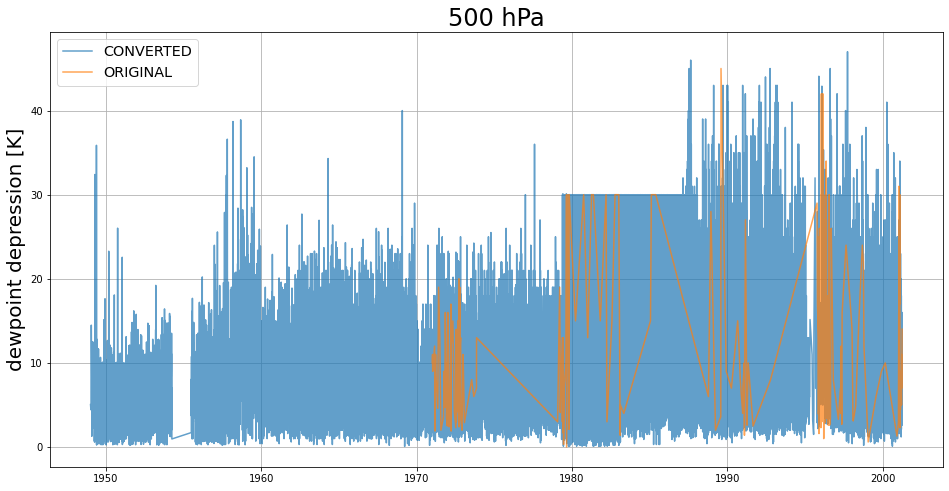

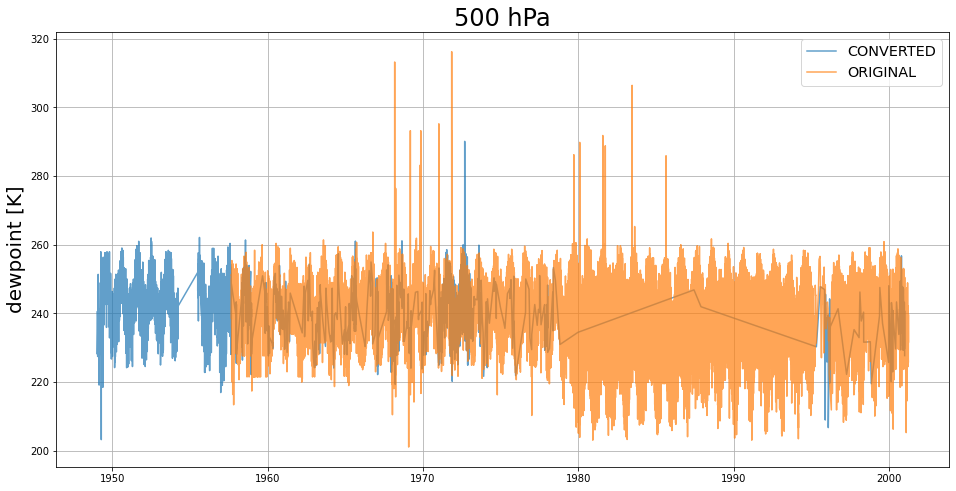

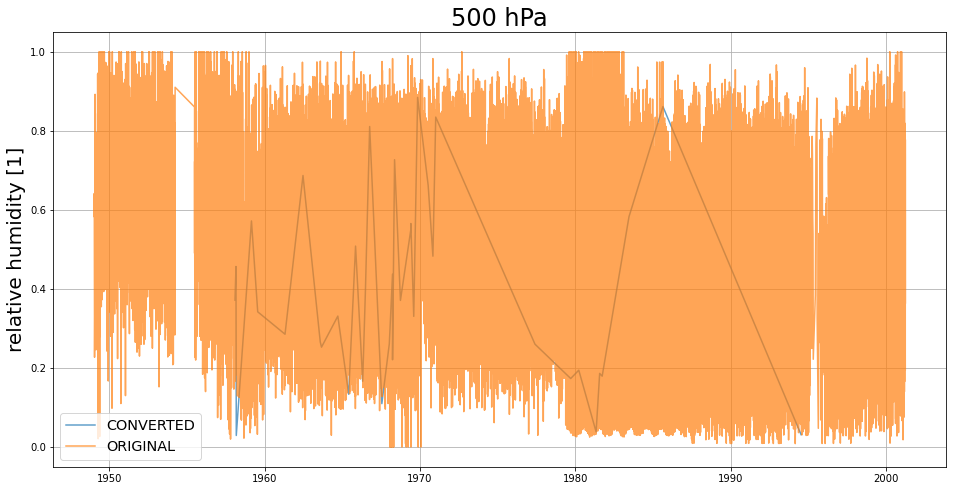

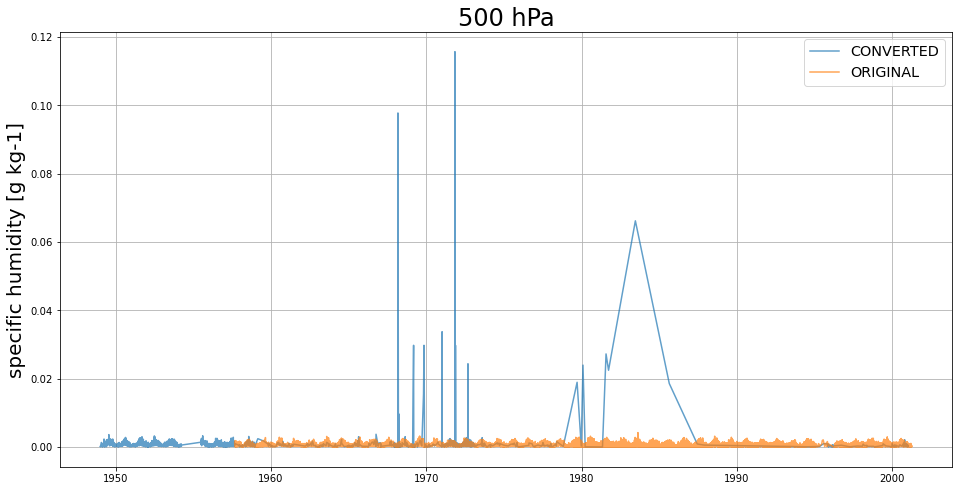

In [19]:
converted = aa[aa.z_coordinate == 50000.][aa.observed_variable == 34][aa.conversion_flag == 0]
original = aa[aa.z_coordinate == 50000.][aa.observed_variable == 34][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='dewpoint depression [K]', title='500 hPa')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.z_coordinate == 50000.][aa.observed_variable == 36][aa.conversion_flag == 0]
original = aa[aa.z_coordinate == 50000.][aa.observed_variable == 36][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='dewpoint [K]', title='500 hPa')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.z_coordinate == 50000.][aa.observed_variable == 38][aa.conversion_flag == 0]
original = aa[aa.z_coordinate == 50000.][aa.observed_variable == 38][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='relative humidity [1]', title='500 hPa')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.z_coordinate == 50000.][aa.observed_variable == 39][aa.conversion_flag == 0]
original = aa[aa.z_coordinate == 50000.][aa.observed_variable == 39][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='specific humidity [g kg-1]', title='500 hPa')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

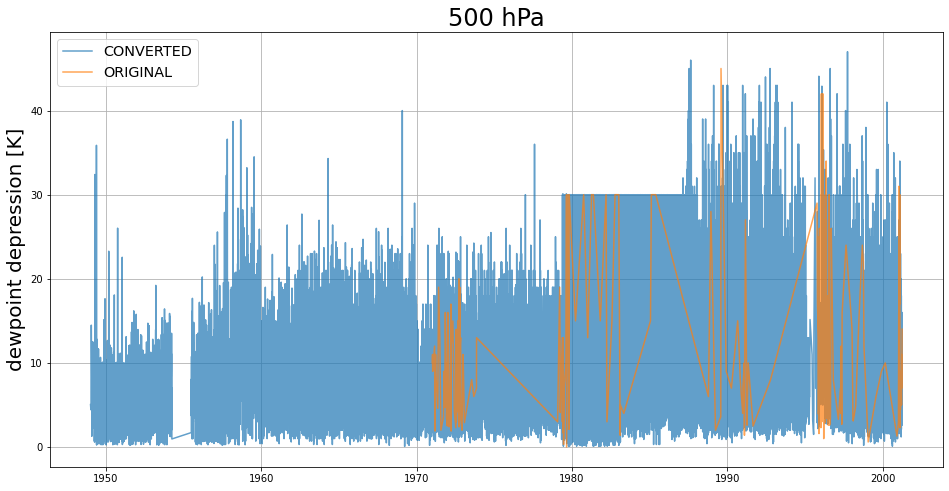

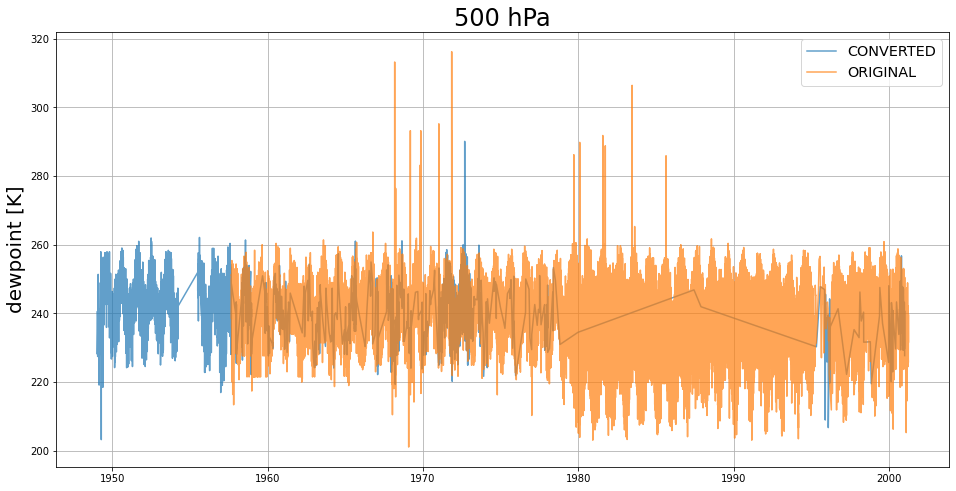

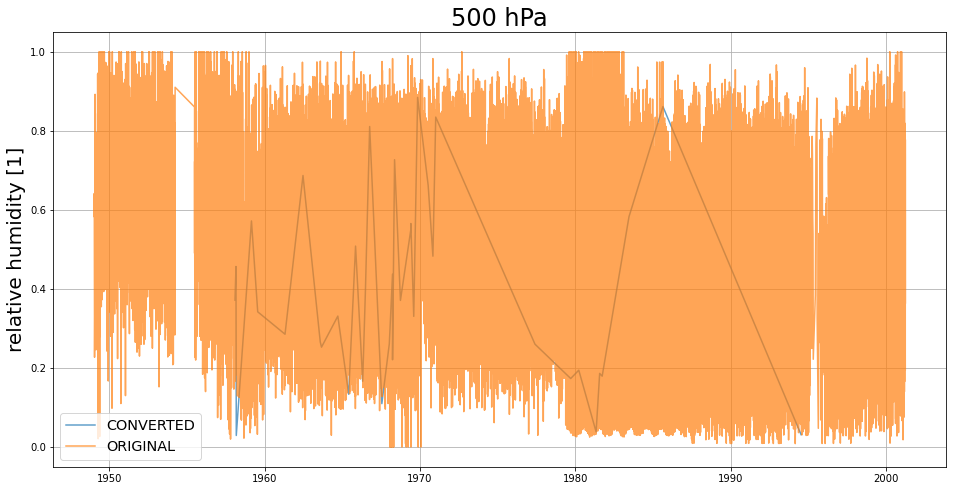

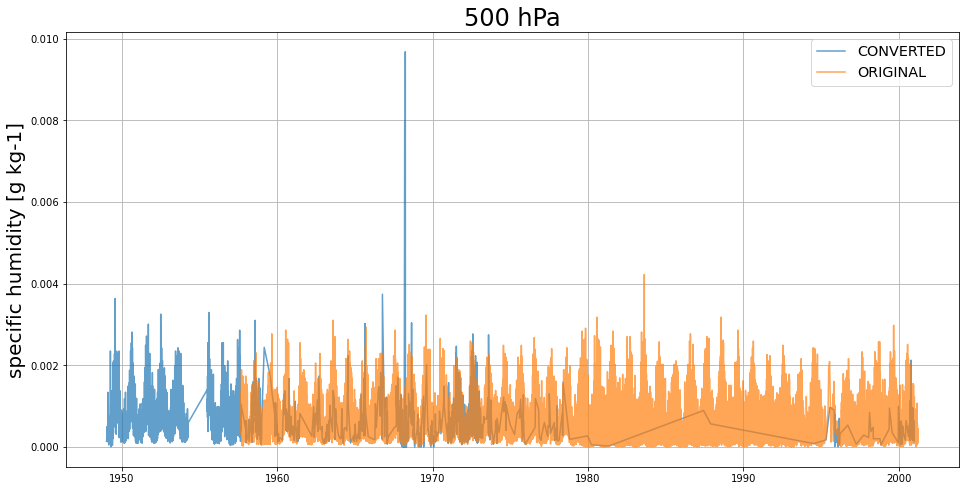

In [20]:
converted = aa[aa.z_coordinate == 50000.][aa.observed_variable == 34][aa.conversion_flag == 0]
original = aa[aa.z_coordinate == 50000.][aa.observed_variable == 34][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='dewpoint depression [K]', title='500 hPa')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.z_coordinate == 50000.][aa.observed_variable == 36][aa.conversion_flag == 0]
original = aa[aa.z_coordinate == 50000.][aa.observed_variable == 36][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='dewpoint [K]', title='500 hPa')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.z_coordinate == 50000.][aa.observed_variable == 38][aa.conversion_flag == 0][aa.observation_value < 5]
original = aa[aa.z_coordinate == 50000.][aa.observed_variable == 38][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='relative humidity [1]', title='500 hPa')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.z_coordinate == 50000.][aa.observed_variable == 39][aa.conversion_flag == 0][aa.observation_value < 0.01]
original = aa[aa.z_coordinate == 50000.][aa.observed_variable == 39][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='specific humidity [g kg-1]', title='500 hPa')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

---
---

# wind

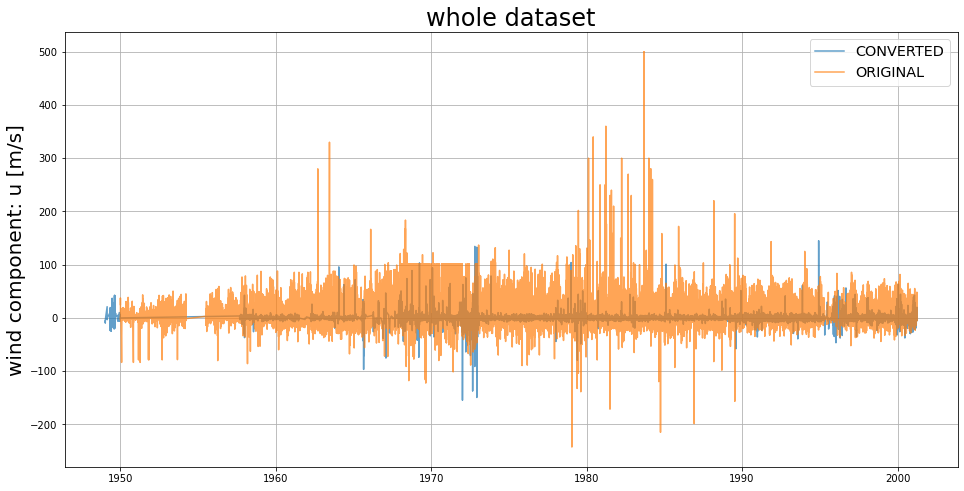

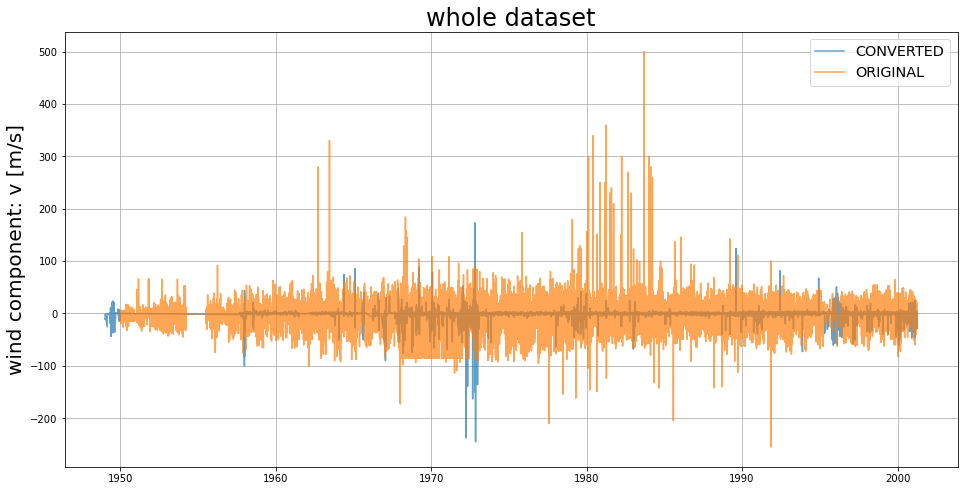

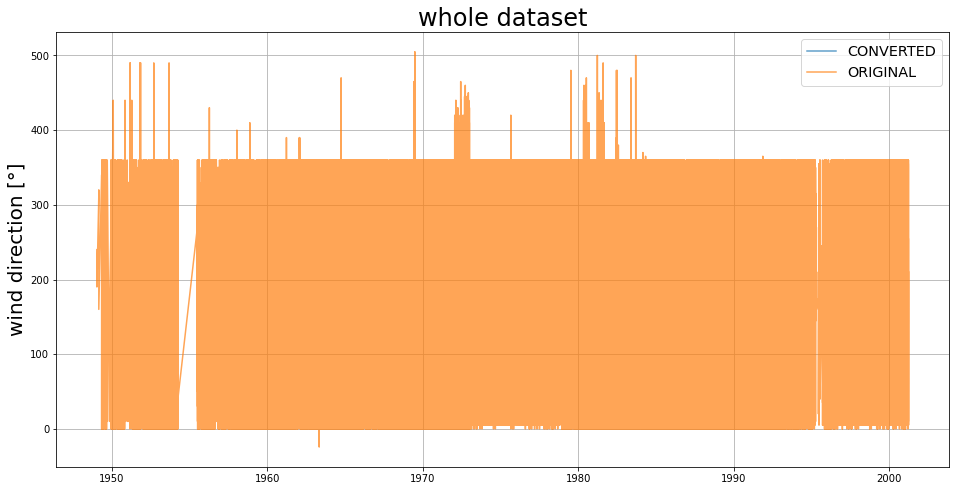

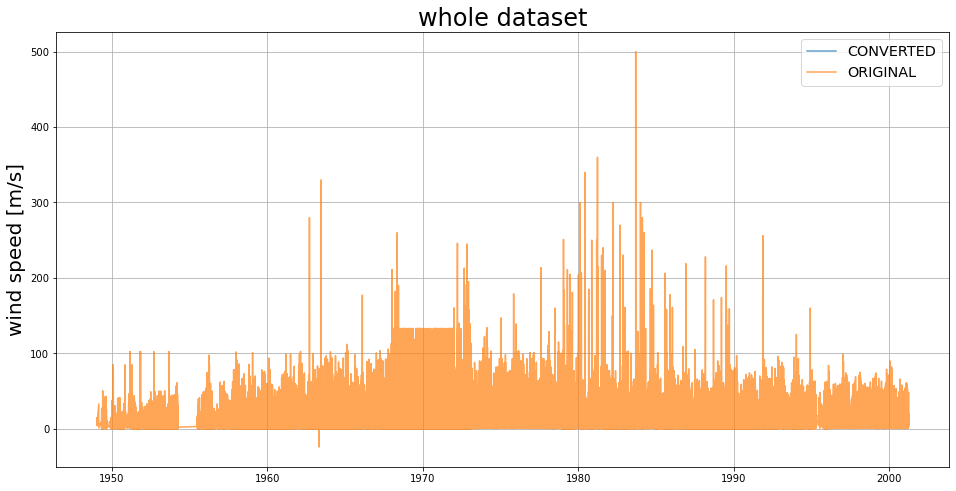

In [21]:
converted = aa[aa.observed_variable == 104][aa.conversion_flag == 0]
original = aa[aa.observed_variable == 104][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='wind component: u [m/s]', title='whole dataset')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.observed_variable == 105][aa.conversion_flag == 0]
original = aa[aa.observed_variable == 105][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='wind component: v [m/s]', title='whole dataset')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.observed_variable == 106][aa.conversion_flag == 0]
original = aa[aa.observed_variable == 106][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='wind direction [°]', title='whole dataset')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.observed_variable == 107][aa.conversion_flag == 0]
original = aa[aa.observed_variable == 107][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='wind speed [m/s]', title='whole dataset')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

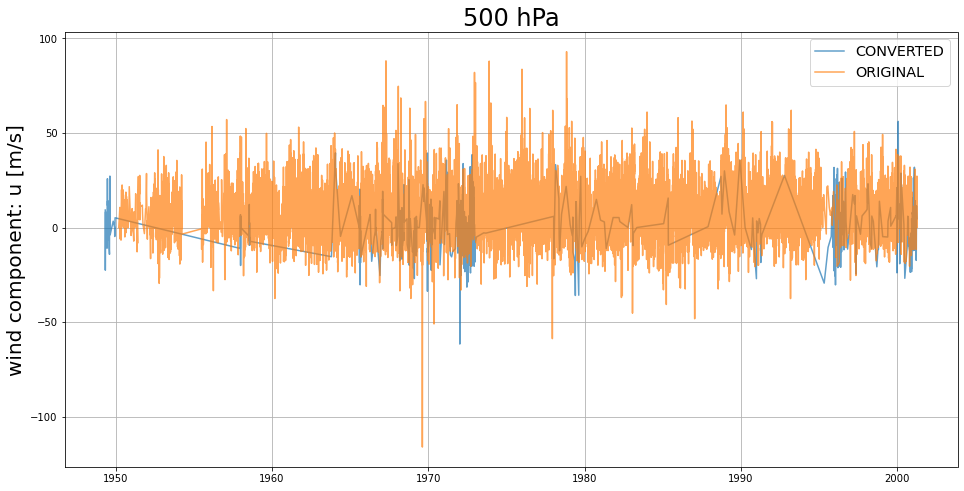

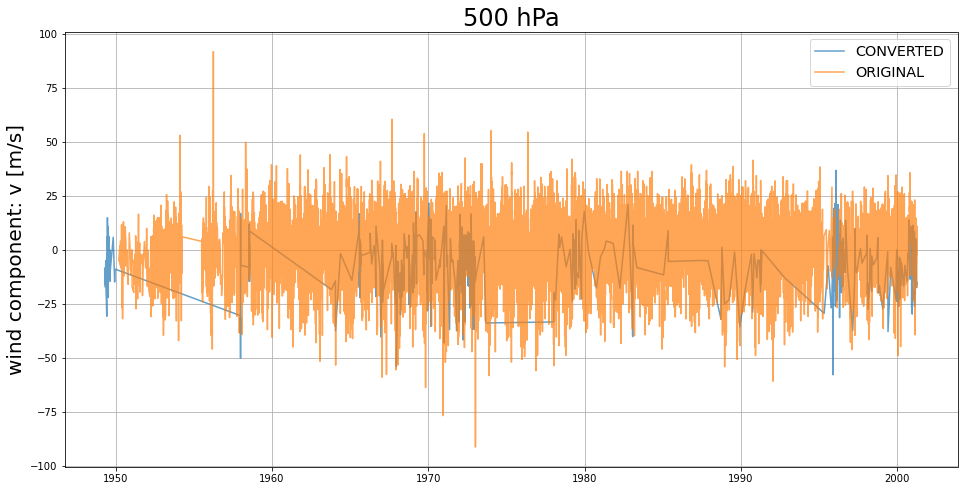

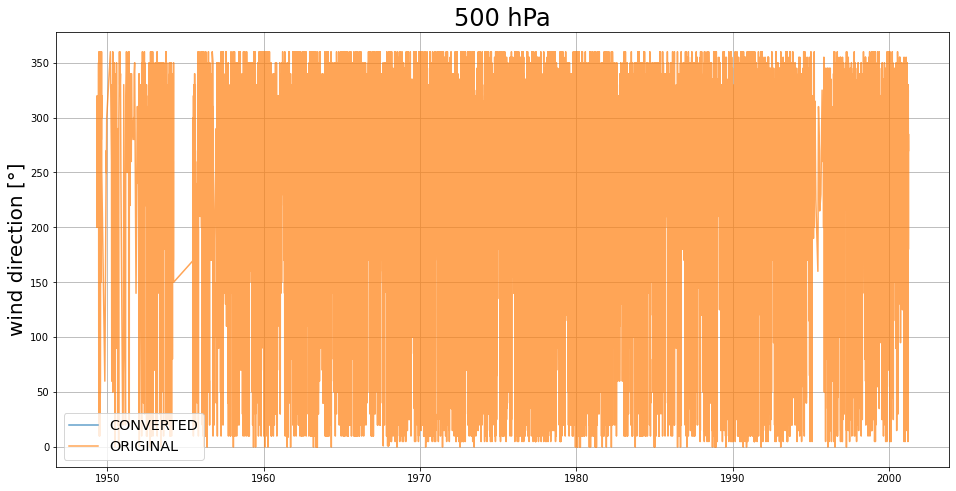

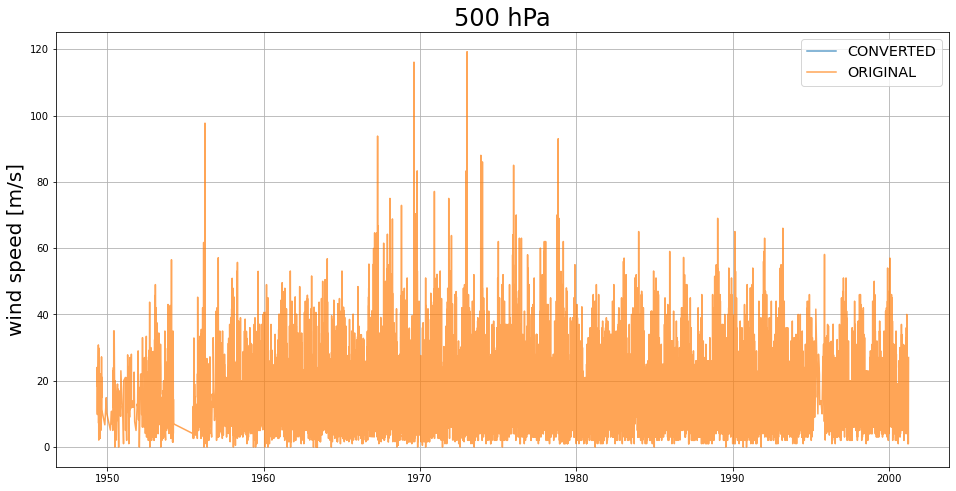

In [22]:
converted = aa[aa.z_coordinate == 50000.][aa.observed_variable == 104][aa.conversion_flag == 0]
original = aa[aa.z_coordinate == 50000.][aa.observed_variable == 104][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='wind component: u [m/s]', title='500 hPa')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.z_coordinate == 50000.][aa.observed_variable == 105][aa.conversion_flag == 0]
original = aa[aa.z_coordinate == 50000.][aa.observed_variable == 105][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='wind component: v [m/s]', title='500 hPa')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.z_coordinate == 50000.][aa.observed_variable == 106][aa.conversion_flag == 0]
original = aa[aa.z_coordinate == 50000.][aa.observed_variable == 106][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='wind direction [°]', title='500 hPa')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)

converted = aa[aa.z_coordinate == 50000.][aa.observed_variable == 107][aa.conversion_flag == 0]
original = aa[aa.z_coordinate == 50000.][aa.observed_variable == 107][aa.conversion_flag != 0]

fig, (ax1) = plt.subplots(1, 1)
fig.set_figheight(8)
fig.set_figwidth(16)
ax1.plot(converted['date_time'], converted['observation_value'], label = 'CONVERTED', alpha=0.7)
ax1.plot(original['date_time'], original['observation_value'], label = 'ORIGINAL', alpha=0.7)
ax1.set(ylabel='wind speed [m/s]', title='500 hPa')
ax1.legend( loc='best')
ax1.grid()
plt.show()
plt.close(fig)